# TWITTER SENTIMENT ANALYSIS USING NAIVE BAYES

In [2]:
import re #for regular expressions
import nltk #for text manipulation
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
pd.set_option("display.max_colwidth",200)
warnings.filterwarnings("ignore",category=DeprecationWarning)
%matplotlib inline

In [9]:
train = pd.read_csv('covid_tweets_train.csv')
test = pd.read_csv('covid_tweets_test.csv')

In [10]:
train.head()

Unnamed: 0             user  \
0           0              ANI   
1           1  Mr_Rizz_Mangwai   
2           2     MrMasonMills   
3           3       ArtBristow   
4           4  Chinmay16101200   

                                                                                                                                                                                                      text  
0                                                                                                                          Sources: Indian Premier League (IPL)-2020 postponed till April 15. #Coronavirus  
1                                                                                                   I doubt that we just got our first #coronavirus case in Kenya. \n \nAnyway, ukikohoa karibu na mimi...  
2  Stay at home: guidance for people with confirmed or possible coronavirus (COVID-19) infection\n\nhttps://gov.uk/government/publications/covid-19-stay-at-home-guidance/stay-at-home-guidance-for-peo...  
3                                                                                                                                                                          One for @mrs_coyle #coronavirus  
4                                                                                                                                                                         Let’s hope for best #coronavirus

In [11]:
test.head()

Unnamed: 0          user  \
0        4999     ava_today   
1        5000      MissMafu   
2        5001  JonWalters19   
3        5002       memneon   
4        5003   danielnuzum   

                                                                                                                                                                                                      text  
0                                                                                                Phase two of Abadan’s petroleum refinery was shut down as several workers are diagnosed with #coronavirus  
1  So when I landed in Barbados, a country that has no cases of #coronavirus they did temperature checks on everyone coming off the plane. I’ve just returned to the UK and zero checks at all. Is this...  
2  We need to cancel the @premierleague and @EFL \n-There should be no champion for 2019/20 and the teams at risk of relegation should be spared.\n-Expand the size of leagues from 2020/21 so that the...  
3                                          The UK strategy on the #coronavirus in a nutshell:\n\n1. The Tories loath state intervention \n\n2. Social Darwinism\n\n3. The next election is five years away  
4  Ok our children are now off school. PLEASE do outdoor stuff and NO play dates to stop the spread of #coronavirus Children are high impact transmitters. And have fun with them & reduce fear. #famil...

In [12]:
train.shape

(4999, 3)

In [13]:
test.shape

(1180, 3)

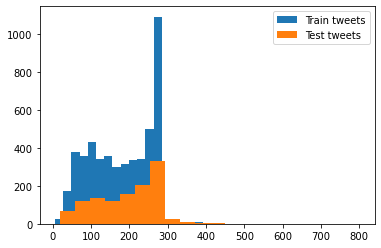

In [14]:
length_train_dataset = train['text'].str.len()
length_test_dataset = test['text'].str.len()
plt.hist(length_train_dataset, bins=20,label="Train tweets")
plt.hist(length_test_dataset, bins=20,label="Test tweets")
plt.legend() 
plt.show()

In [15]:
combine=train.append(test,ignore_index=True) #train and test dataset are combined
combine.shape

(6179, 3)

In [16]:
def remove_pattern(input_text,pattern):
    r= re.findall(pattern, input_text)
    for i in r:
        input_text = re.sub(i, '', input_text)
    return input_text
                      

# Removing twitter handles

In [18]:
combine['tidy_tweet'] = np.vectorize(remove_pattern)(combine['text'],"@[\w]*") 
combine.head()

Unnamed: 0             user  \
0           0              ANI   
1           1  Mr_Rizz_Mangwai   
2           2     MrMasonMills   
3           3       ArtBristow   
4           4  Chinmay16101200   

                                                                                                                                                                                                      text  \
0                                                                                                                              Sources: Indian Premier League (IPL)-2020 postponed till April #Coronavirus   
1                                                                                                                           doubt that just first #coronavirus case Kenya. Anyway, ukikohoa karibu mimi...   
2  Stay home: guidance people with confirmed possible coronavirus (COVID-19) infection https://gov.uk/government/publications/covid-19-stay-at-home-guidance/stay-at-home-guidance-for-people-with-conf...   
3                                                                                                                                                                                  @mrs_coyle #coronavirus   
4                                                                                                                                                                             Let’s hope best #coronavirus   

                                                                                                                                                                                                tidy_tweet  
0                                                                                                                              Sources: Indian Premier League (IPL)-2020 postponed till April #Coronavirus  
1                                                                                                                           doubt that just first #coronavirus case Kenya. Anyway, ukikohoa karibu mimi...  
2  Stay home: guidance people with confirmed possible coronavirus (COVID-19) infection https://gov.uk/government/publications/covid-19-stay-at-home-guidance/stay-at-home-guidance-for-people-with-conf...  
3                                                                                                                                                                                             #coronavirus  
4                                                                                                                                                                             Let’s hope best #coronavirus

# Removing short words (a,is,so etc..)

In [19]:
combine['tidy_tweet'] = combine['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3])) #removing words whose length is less than 3

In [20]:
combine.head()

Unnamed: 0             user  \
0           0              ANI   
1           1  Mr_Rizz_Mangwai   
2           2     MrMasonMills   
3           3       ArtBristow   
4           4  Chinmay16101200   

                                                                                                                                                                                                      text  \
0                                                                                                                              Sources: Indian Premier League (IPL)-2020 postponed till April #Coronavirus   
1                                                                                                                           doubt that just first #coronavirus case Kenya. Anyway, ukikohoa karibu mimi...   
2  Stay home: guidance people with confirmed possible coronavirus (COVID-19) infection https://gov.uk/government/publications/covid-19-stay-at-home-guidance/stay-at-home-guidance-for-people-with-conf...   
3                                                                                                                                                                                  @mrs_coyle #coronavirus   
4                                                                                                                                                                             Let’s hope best #coronavirus   

                                                                                                                                                                                                tidy_tweet  
0                                                                                                                              Sources: Indian Premier League (IPL)-2020 postponed till April #Coronavirus  
1                                                                                                                           doubt that just first #coronavirus case Kenya. Anyway, ukikohoa karibu mimi...  
2  Stay home: guidance people with confirmed possible coronavirus (COVID-19) infection https://gov.uk/government/publications/covid-19-stay-at-home-guidance/stay-at-home-guidance-for-people-with-conf...  
3                                                                                                                                                                                             #coronavirus  
4                                                                                                                                                                             Let’s hope best #coronavirus

In [21]:
tokenized_tweet = combine['tidy_tweet'].apply(lambda x:x.split()) #it will split all words by whitespace
tokenized_tweet.head()

0                                                                                                                      [Sources:, Indian, Premier, League, (IPL)-2020, postponed, till, April, #Coronavirus]
1                                                                                                                 [doubt, that, just, first, #coronavirus, case, Kenya., Anyway,, ukikohoa, karibu, mimi...]
2    [Stay, home:, guidance, people, with, confirmed, possible, coronavirus, (COVID-19), infection, https://gov.uk/government/publications/covid-19-stay-at-home-guidance/stay-at-home-guidance-for-peopl...
3                                                                                                                                                                                             [#coronavirus]
4                                                                                                                                                                          [Let’s, h

In [22]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) #it will stemmatized all words in tweet

In [23]:
#now let's combine these tokens back

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i]) #concat all words into one sentence
combine['tidy_tweet'] = tokenized_tweet

In [32]:
combine=combine.fillna(0) #replace all null values by 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, combine['user'],
                                                    test_size=0.2, random_state=69)

In [33]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (4943, 1000)
X_test_shape :  (1236, 1000)
y_train_shape :  (4943,)
y_test_shape :  (1236,)


In [ ]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)

In [ ]:
# from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.9407038242473555

# SVM IMPLEMENTATION

In [2]:
import re #for regular expressions
import nltk #for text manipulation
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
pd.set_option("display.max_colwidth",200)
warnings.filterwarnings("ignore",category=DeprecationWarning)
%matplotlib inline

In [4]:
train = pd.read_csv('covid_tweets_train.csv')
test = pd.read_csv('covid_tweets_test.csv')

In [5]:
combine=train.append(test,ignore_index=True) #train and test dataset are combined
combine.shape

(6179, 3)

In [6]:
combine.head()

Unnamed: 0             user  \
0           0              ANI   
1           1  Mr_Rizz_Mangwai   
2           2     MrMasonMills   
3           3       ArtBristow   
4           4  Chinmay16101200   

                                                                                                                                                                                                      text  
0                                                                                                                          Sources: Indian Premier League (IPL)-2020 postponed till April 15. #Coronavirus  
1                                                                                                   I doubt that we just got our first #coronavirus case in Kenya. \n \nAnyway, ukikohoa karibu na mimi...  
2  Stay at home: guidance for people with confirmed or possible coronavirus (COVID-19) infection\n\nhttps://gov.uk/government/publications/covid-19-stay-at-home-guidance/stay-at-home-guidance-for-peo...  
3                                                                                                                                                                          One for @mrs_coyle #coronavirus  
4                                                                                                                                                                         Let’s hope for best #coronavirus

# Removing twitter handles

In [8]:
def remove_pattern(input_text,pattern):
    r= re.findall(pattern, input_text)
    for i in r:
        input_text = re.sub(i, '', input_text)
    return input_text
                      

In [9]:
combine['tidy_tweet'] = np.vectorize(remove_pattern)(combine['text'],"@[\w]*") 
combine.head()

Unnamed: 0             user  \
0           0              ANI   
1           1  Mr_Rizz_Mangwai   
2           2     MrMasonMills   
3           3       ArtBristow   
4           4  Chinmay16101200   

                                                                                                                                                                                                      text  \
0                                                                                                                          Sources: Indian Premier League (IPL)-2020 postponed till April 15. #Coronavirus   
1                                                                                                   I doubt that we just got our first #coronavirus case in Kenya. \n \nAnyway, ukikohoa karibu na mimi...   
2  Stay at home: guidance for people with confirmed or possible coronavirus (COVID-19) infection\n\nhttps://gov.uk/government/publications/covid-19-stay-at-home-guidance/stay-at-home-guidance-for-peo...   
3                                                                                                                                                                          One for @mrs_coyle #coronavirus   
4                                                                                                                                                                         Let’s hope for best #coronavirus   

                                                                                                                                                                                                tidy_tweet  
0                                                                                                                          Sources: Indian Premier League (IPL)-2020 postponed till April 15. #Coronavirus  
1                                                                                                   I doubt that we just got our first #coronavirus case in Kenya. \n \nAnyway, ukikohoa karibu na mimi...  
2  Stay at home: guidance for people with confirmed or possible coronavirus (COVID-19) infection\n\nhttps://gov.uk/government/publications/covid-19-stay-at-home-guidance/stay-at-home-guidance-for-peo...  
3                                                                                                                                                                                    One for  #coronavirus  
4                                                                                                                                                                         Let’s hope for best #coronavirus

# Removing short words (a,is,so etc..)

In [10]:
combine['tidy_tweet'] = combine['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3])) #removing words whose length is less than 3

In [11]:
tokenized_tweet = combine['tidy_tweet'].apply(lambda x:x.split()) #it will split all words by whitespace
tokenized_tweet.head()

0                                                                                                                      [Sources:, Indian, Premier, League, (IPL)-2020, postponed, till, April, #Coronavirus]
1                                                                                                                 [doubt, that, just, first, #coronavirus, case, Kenya., Anyway,, ukikohoa, karibu, mimi...]
2    [Stay, home:, guidance, people, with, confirmed, possible, coronavirus, (COVID-19), infection, https://gov.uk/government/publications/covid-19-stay-at-home-guidance/stay-at-home-guidance-for-peopl...
3                                                                                                                                                                                             [#coronavirus]
4                                                                                                                                                                          [Let’s, h

In [21]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) #it will stemmatized all words in tweet

In [25]:
#now let's combine these tokens back

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i]) #concat all words into one sentence
combine['tidy_tweet'] = tokenized_tweet
combine.head()

Unnamed: 0             user  \
0           0              ANI   
1           1  Mr_Rizz_Mangwai   
2           2     MrMasonMills   
3           3       ArtBristow   
4           4  Chinmay16101200   

                                                                                                                                                                                                      text  \
0                                                                                                                          Sources: Indian Premier League (IPL)-2020 postponed till April 15. #Coronavirus   
1                                                                                                   I doubt that we just got our first #coronavirus case in Kenya. \n \nAnyway, ukikohoa karibu na mimi...   
2  Stay at home: guidance for people with confirmed or possible coronavirus (COVID-19) infection\n\nhttps://gov.uk/government/publications/covid-19-stay-at-home-guidance/stay-at-home-guidance-for-peo...   
3                                                                                                                                                                          One for @mrs_coyle #coronavirus   
4                                                                                                                                                                         Let’s hope for best #coronavirus   

                                                                                                                                                                                                tidy_tweet  
0  s               o               u               r               c               e               s               :                               i               n               d               i   ...  
1  d               o               u               b               t                               t               h               a               t                               j               u   ...  
2  s               t               a               y                               h               o               m               e               :                               g               u   ...  
3                                        #               c               o               r               o               n               a               v               i               r               u  
4  l               e               t               ’                               h               o               p               e                               b               e               s   ...

In [29]:
data_model=combine[['tidy_tweet']]

In [31]:
x=np.asarray(data_model)
y=np.asarray(combine['tidy_tweet'])

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=4)

In [ ]:
from sklearn import svm
classifier=svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(x_train,y_train)
score_predict=classifier.predict(x_test)

score_predict = classification(y_test,y_predict))
print("Accuracy withSvm: ",score_predict)

Accuracy withSvm: 0.9507038242473555

# Ferry Disaster Survival in Mombasa Using Logistic Regression

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
ferry_data=pd.read_csv('ferry.csv')

In [37]:
len(ferry_data)

891

In [38]:
#View the data using head function which returns top rows
ferry_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [39]:
ferry_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [40]:
ferry_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [41]:
ferry_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

# Data Analysis

In [42]:
#Find out how many survived vs Died using countplot method of seaboarn

<AxesSubplot:xlabel='Survived', ylabel='count'>

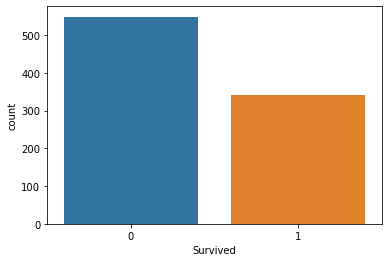

In [43]:
sns.countplot(x='Survived',data=ferry_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

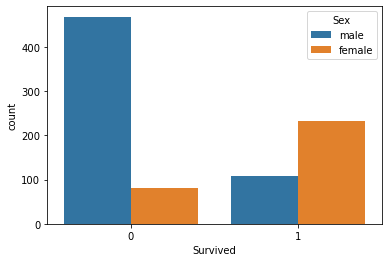

In [45]:
sns.countplot(x='Survived',data=ferry_data,hue='Sex')

In [46]:
ferry_data.isna()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False  False     False  
4    False   True     False  
..     ...    ...       ...  
886  False   True     False  
887  False  False     False  
888  False   True     False  
889  False  False     False  
890  False   True     False  

[891 rows x 12 columns]

In [47]:
ferry_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

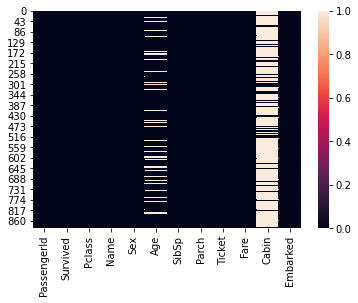

In [48]:
sns.heatmap(ferry_data.isna())

In [50]:
(ferry_data['Age'].isna().sum()/len(ferry_data['Age']))*100

19.865319865319865

In [51]:
(ferry_data['Cabin'].isna().sum()/len(ferry_data['Cabin']))*100

77.10437710437711

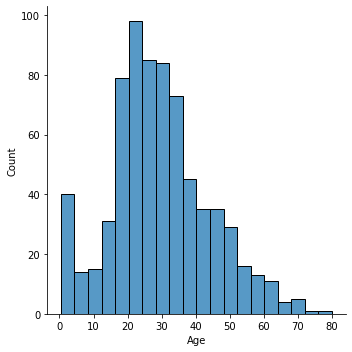

In [52]:
sns.displot(x='Age',data=ferry_data)

# Data Cleaning

In [53]:
ferry_data['Age'].fillna(ferry_data['Age'].mean(),inplace=True)

In [54]:
ferry_data.drop('Cabin',axis=1,inplace=True)

In [55]:
ferry_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [56]:
gender=pd.get_dummies(ferry_data['Sex'],drop_first=True)

In [57]:
ferry_data['Gender']=gender

In [58]:
ferry_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  Gender  
0      0         A/5 21171   7.2500        S       1  
1      0          PC 17599  71.2833        C       0  
2      0  STON/O2. 3101282   7.9250        S       0  
3      0            113803  53.1000        S       0  
4      0            373450   8.0500        S       1

In [59]:
ferry_data.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [60]:
ferry_data.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Gender
0            1         0       3  22.0      1      0   7.2500       1
1            2         1       1  38.0      1      0  71.2833       0
2            3         1       3  26.0      0      0   7.9250       0
3            4         1       1  35.0      1      0  53.1000       0
4            5         0       3  35.0      0      0   8.0500       1

In [63]:
#Seperate Dependent and Independent variables

In [61]:
x=ferry_data[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Gender']]
y=ferry_data['Survived']

In [62]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Building Model using Logestic Regression

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
predict=lr.predict(x_test)

In [67]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

Predicted No  Predicted Yes
Actual No            151             24
Actual Yes            38             82

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       175
           1       0.77      0.68      0.73       120

    accuracy                           0.79       295
   macro avg       0.79      0.77      0.78       295
weighted avg       0.79      0.79      0.79       295

